# Aggregations: Min, Max, and everything In between

Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question. Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

# Summing the value in an Array

As a quick example, consider computing the sum of all values in an array. Python itself can do this using the built-in sum function:

In [1]:
import numpy as np

In [2]:
L = np.random.random(100)
sum(L)

47.416260629201815

The syntax is quite similar to that of NumPy sum function, and the result is the same in the simplest case:

In [3]:
np.sum(L)

47.41626062920181

However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [4]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

103 ms ± 903 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
640 µs ± 41 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Be careful, though: the sum function and the np.sum function are not identical, which can sometimes lead to confusion! In particular, their optional arguments have different meanings, and np.sum is aware of multiple array dimensions, as we will see in the following section.

# Minimun and Maximun

Similarly, Python has built-in min and max functions, used to find the minimum value and maximum value of any given array:

In [5]:
min(big_array), max(big_array)

(3.6723222163193014e-07, 0.9999993873953289)

NumPy's corresponding functions have similar syntax, and again operate much more quickly:

In [6]:
np.min(big_array), np.max(big_array)

(3.6723222163193014e-07, 0.9999993873953289)

In [7]:
%timeit min(big_array)
%timeit np.min(big_array)

63.6 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
590 µs ± 7.96 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### For min, max, sum, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [8]:
print(big_array.min(), big_array.max(), big_array.sum())

3.6723222163193014e-07 0.9999993873953289 500304.2660326973


# Multi Dimensional Aggregates


One common type of aggregation operation is an aggregate along a row or column. Say you have some data stored in a two-dimensional array:

In [10]:
M = np.random.random((3, 4))
M

array([[0.74238592, 0.05991859, 0.44374757, 0.9723145 ],
       [0.52112453, 0.07559909, 0.39313256, 0.24069143],
       [0.25932748, 0.22612703, 0.87273805, 0.01476649]])

By default, each NumPy aggregation function will return the aggregate over the entire array:

In [11]:
M.sum()

4.821873246388465

Aggregation functions take an additional argument specifying the axis along which the aggregate is computed. For example, we can find the minimum value within each column by specifying axis=0:

In [12]:
M.min(axis=0)

array([0.25932748, 0.05991859, 0.39313256, 0.01476649])

The function returns four values, correspondig to the four columns of numbers.
Similarly, we can find maximum value within each row:

In [13]:
M.max(axis=1)

array([0.9723145 , 0.52112453, 0.87273805])

The way the axis is specified here can be confusing to users coming from other languages. The axis keyword specifies the dimension of the array that will be collapsed, rather than the dimension that will be returned. So specifying axis=0 means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated.

# Example: What is the Average Height of US Presidents?

In [16]:
!head -4 ../data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [17]:
import pandas as pd

In [20]:
data = pd.read_csv('../data/president_heights.csv')
data.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


In [21]:
#note that the heights are measured in centimeters
heights = np.array(data['height(cm)'])
heights

array([189, 170, 189, 163, 183, 171, 185, 168, 173, 183, 173, 173, 175,
       178, 183, 193, 178, 173, 174, 183, 183, 168, 170, 178, 182, 180,
       183, 178, 182, 188, 175, 179, 183, 193, 182, 183, 177, 185, 188,
       188, 182, 185])

now that we have this data array, we can compute a variety of summary statistics

In [23]:
print("Mean Height ", heights.mean())
print("Standard Deviation", heights.std())
print("Mininum Height ", heights.min())
print("Maximum height:    ", heights.max())

Mean Height  179.73809523809524
Standard Deviation 6.931843442745892
Mininum Height  163
Maximum height:     193


Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values. We may also wish to compute quantiles:

In [24]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


We see that the median height of US presidents is 182 cm, or just shy of six feet.

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

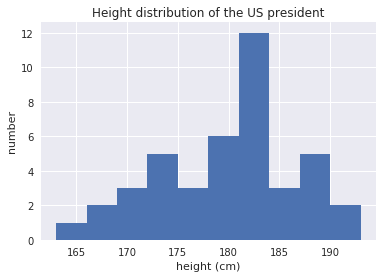

In [28]:
plt.hist(heights)
plt.title("Height distribution of the US president")
plt.xlabel('height (cm)')
plt.ylabel('number');

In [29]:
data

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


NameError: name 'Counter' is not defined